https://pypi.org/project/pyspectra/

Issue installing spc in terminal

In [7]:
#import spc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

https://github.com/spectralpython/spectral/blob/master/spectral/algorithms/algorithms.py
This inlcudes info about some derivatives + code for other supervised and unsupervised learning.
Poss worth returning to

In [8]:
from derivative import dxdt
import numpy as np
import rasterio as rio

data = rio.open("../../preprocessed_data/dimensionality_reduction/cross_lochs_2.tif")

t = np.linspace(0,2*np.pi,50)
# x = np.sin(x) ---- orignial
# x = np.sin(data)

# result3 = dxdt(x, t, kind="spectral")

print(t)

[0.         0.12822827 0.25645654 0.38468481 0.51291309 0.64114136
 0.76936963 0.8975979  1.02582617 1.15405444 1.28228272 1.41051099
 1.53873926 1.66696753 1.7951958  1.92342407 2.05165235 2.17988062
 2.30810889 2.43633716 2.56456543 2.6927937  2.82102197 2.94925025
 3.07747852 3.20570679 3.33393506 3.46216333 3.5903916  3.71861988
 3.84684815 3.97507642 4.10330469 4.23153296 4.35976123 4.48798951
 4.61621778 4.74444605 4.87267432 5.00090259 5.12913086 5.25735913
 5.38558741 5.51381568 5.64204395 5.77027222 5.89850049 6.02672876
 6.15495704 6.28318531]


Using the Excel spreadsheet sent by Doreen as a basis:

In [30]:
import rasterio as rio
cross_lochs_test = rio.open('../../preprocessed_data/dimensionality_reduction/cross_lochs_2.tif')
# number of bands
cross_lochs_test.count
# read bands
array = cross_lochs_test.read()
# convert to a DataFrame
import pandas as pd
cross_lochs_df = pd.DataFrame()

array_num = 0
band_num = 1

for num in range(358):
    cross_lochs_df['band' +str(band_num)]=array[array_num].ravel()
    array_num += 1
    band_num += 1


cross_lochs_df.head(2)

# NB when do this, will want a PFT column, which will include in randmisation, then split the train and 
# test data into x (bands) and y (PFT)

/tmp/ipykernel_22089/2032542278.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  cross_lochs_df['band' +str(band_num)]=array[array_num].ravel()


,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band349,band350,band351,band352,band353,band354,band355,band356,band357,band358
0,0.001099,0.003430,0.004752,0.006146,0.006639,0.009240,0.010558,0.011710,0.013801,0.015441,...,0.077946,0.077413,0.077153,0.078934,0.074587,0.072792,0.075150,0.074088,0.074698,0.072249
1,0.003365,0.002541,0.004668,0.006236,0.006519,0.008654,0.010603,0.012083,0.012975,0.015468,...,0.075149,0.073557,0.071610,0.071727,0.069210,0.070987,0.072956,0.070970,0.067680,0.067113


In [33]:
cross_lochs_df.loc['mean'] = cross_lochs_df.mean()

In [34]:
cross_lochs_df.tail(5)

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band349,band350,band351,band352,band353,band354,band355,band356,band357,band358
42017,0.002455,0.002271,0.004029,0.005480,0.006396,0.008863,0.011025,0.012685,0.014688,0.016403,...,0.074812,0.074165,0.074525,0.076327,0.073803,0.074018,0.074871,0.075158,0.073604,0.075263
42018,0.002387,0.002279,0.004424,0.005426,0.006352,0.008929,0.010853,0.012708,0.014964,0.017395,...,0.083522,0.084427,0.082219,0.084963,0.082753,0.083324,0.083870,0.084588,0.081337,0.082178
42019,0.002777,0.002263,0.004564,0.005324,0.006339,0.008972,0.011173,0.012952,0.015367,0.017710,...,0.092424,0.092237,0.093722,0.092127,0.094481,0.092089,0.094319,0.095786,0.090843,0.091052
42020,0.002096,0.002014,0.004155,0.005212,0.006220,0.008746,0.010900,0.012765,0.015355,0.017640,...,0.096940,0.097260,0.095198,0.097331,0.094004,0.092630,0.094959,0.095417,0.094887,0.096628
mean,0.001254,0.002138,0.003960,0.005098,0.006120,0.008425,0.010456,0.012139,0.014304,0.016267,...,0.082060,0.082205,0.081238,0.082423,0.080989,0.081207,0.081550,0.082234,0.080923,0.080996


In [35]:
wavelengths = pd.read_csv("../../preprocessed_data/wavelengths.csv")

In [36]:
wavelengths.describe()

,Wavelength
count,358.000000
mean,1349.831039
std,605.878480
min,377.071821
25%,824.094321
50%,1271.116821
75%,1948.539321
max,2395.561821


In [37]:
mean = cross_lochs_df.loc[['mean']]
mean.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band349,band350,band351,band352,band353,band354,band355,band356,band357,band358
mean,0.001254,0.002138,0.00396,0.005098,0.00612,0.008425,0.010456,0.012139,0.014304,0.016267,...,0.08206,0.082205,0.081238,0.082423,0.080989,0.081207,0.08155,0.082234,0.080923,0.080996


In [38]:
original_spectra = mean.transpose()
original_spectra = original_spectra.rename(columns={'mean': 'Original Spectra'})
#original_spectra = original_spectra.rename(index={0:357}) # want to rename to match the other dataframe
original_spectra = original_spectra.reset_index()
# original_spectra = 
original_spectra.head()
original_spectra.describe()

,Original Spectra
count,358.000000
mean,0.175729
std,0.099915
min,0.001254
25%,0.093539
50%,0.181250
75%,0.261180
max,0.499453


In [39]:
#derivatives = pd.DataFrame(wavelengths)
derivatives = pd.concat([wavelengths,original_spectra], axis=1)
derivatives.tail()

# why has it lost one of the bands (there should be 358 - reason = starts at 0) and why is the original spectra NaN
# - matching number of values + changed the index names (row headings) to see if that was the issue?

,Wavelength,index,Original Spectra
353,2375.531821,band354,0.081207
354,2380.541821,band355,0.081550
355,2385.551821,band356,0.082234
356,2390.561821,band357,0.080923
357,2395.561821,band358,0.080996


In [40]:
#derivatives["First Derivative"] = ('Original Spectra' / 'Wavelength') # don't know how to write the equation here - see excel (interaction between rows as well as columns)
derivatives["Shifted_wavelength"] = derivatives["Wavelength"].shift(-1, fill_value=0)
derivatives["Shifted_original_spectra"] = derivatives["Original Spectra"].shift(-1, fill_value=0)

derivatives.tail()

,Wavelength,index,Original Spectra,Shifted_wavelength,Shifted_original_spectra
353,2375.531821,band354,0.081207,2380.541821,0.081550
354,2380.541821,band355,0.081550,2385.551821,0.082234
355,2385.551821,band356,0.082234,2390.561821,0.080923
356,2390.561821,band357,0.080923,2395.561821,0.080996
357,2395.561821,band358,0.080996,0.000000,0.000000


In [41]:
derivatives["First_derivative"] = (derivatives["Shifted_original_spectra"] - derivatives["Original Spectra"]) / (derivatives["Shifted_wavelength"] - derivatives["Wavelength"])

derivatives.tail()

,Wavelength,index,Original Spectra,Shifted_wavelength,Shifted_original_spectra,First_derivative
353,2375.531821,band354,0.081207,2380.541821,0.081550,0.000069
354,2380.541821,band355,0.081550,2385.551821,0.082234,0.000137
355,2385.551821,band356,0.082234,2390.561821,0.080923,-0.000262
356,2390.561821,band357,0.080923,2395.561821,0.080996,0.000015
357,2395.561821,band358,0.080996,0.000000,0.000000,0.000034


In [42]:
derivatives["Second_derivative"] = (derivatives["Shifted_original_spectra"] - derivatives["Original Spectra"]*2) / (derivatives["Shifted_wavelength"] - derivatives["Wavelength"])**2

derivatives.tail()

,Wavelength,index,Original Spectra,Shifted_wavelength,Shifted_original_spectra,First_derivative,Second_derivative
353,2375.531821,band354,0.081207,2380.541821,0.081550,0.000069,-3.221621e-03
354,2380.541821,band355,0.081550,2385.551821,0.082234,0.000137,-3.221736e-03
355,2385.551821,band356,0.082234,2390.561821,0.080923,-0.000262,-3.328466e-03
356,2390.561821,band357,0.080923,2395.561821,0.080996,0.000015,-3.234034e-03
357,2395.561821,band358,0.080996,0.000000,0.000000,0.000034,-2.822789e-08


[Text(0.5, 0, 'Bands'), Text(0, 0.5, 'Reflectance')]

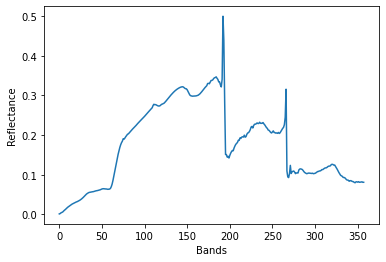

In [43]:
original_spectra_graph = derivatives["Original Spectra"].plot.line()
original_spectra_graph.set(xlabel="Bands", ylabel="Reflectance")

[Text(0.5, 0, 'Bands'), Text(0, 0.5, 'Reflectance')]

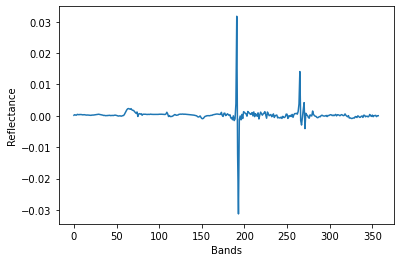

In [44]:
first_derivatives_graph = derivatives["First_derivative"].plot.line()
first_derivatives_graph.set(xlabel="Bands", ylabel="Reflectance")

[Text(0.5, 0, 'Bands'), Text(0, 0.5, 'Reflectance')]

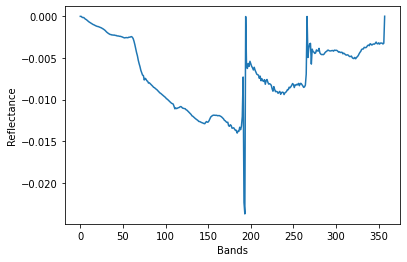

In [45]:
second_derivatives_graph = derivatives["Second_derivative"].plot.line()
second_derivatives_graph.set(xlabel="Bands", ylabel="Reflectance")

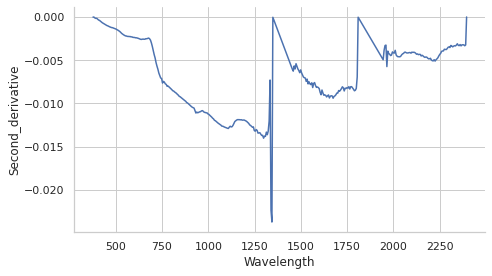

In [53]:
import seaborn as sns

sns.set_theme(style = "whitegrid")

sns.relplot(x="Wavelength", y="Second_derivative", kind="line", data=derivatives, height=4, aspect=7/4)

Need to create first derivatives for different PFTs
1. import csv with the PFTs for the samples - done
2. calculate the first derivative for each sample - done
4. create graph with all 6 derivatives on it (mean of each PFT) - need to split into each
5. put into a table which can then be used in RF
6. run RF
7. compare to kmc
8. repeat with second derivative


In [27]:
import pandas as pd
import geopandas
cross_lochs = pd.read_csv('../supervised/cross_lochs_sample_for_rf2.csv')

cross_lochs['geometry'] = geopandas.GeoSeries.from_wkt(cross_lochs['geometry'])

cross_lochs_gdf = geopandas.GeoDataFrame(cross_lochs, geometry='geometry')

cross_lochs_gdf

,Unnamed: 0,band1,band2,band3,band4,band5,band6,band7,band8,band9,...,band355,band356,band357,band358,POINTID,geometry,GRID_CODE,PFT,line,num_sample
0,617,0.000951,0.005150,0.005988,0.006720,0.007361,0.010606,0.012082,0.014234,0.015797,...,0.096350,0.095506,0.098056,0.096859,618,POINT (444764.308 6472590.655),0.000951,calluna_mix,4,1
1,822,0.002991,0.004075,0.004819,0.005989,0.007388,0.009729,0.012035,0.013280,0.016029,...,0.090096,0.090060,0.089917,0.090350,823,POINT (444774.308 6472585.655),0.002991,calluna_mix,5,2
2,1230,0.002812,0.003526,0.005374,0.006186,0.007536,0.009726,0.011938,0.013003,0.016773,...,0.090578,0.089190,0.087724,0.090253,1231,POINT (444784.308 6472575.655),0.002812,calluna_mix,7,3
3,1841,0.002776,0.004215,0.004849,0.006305,0.008160,0.010193,0.012259,0.014886,0.015938,...,0.096585,0.099090,0.097692,0.098034,1842,POINT (444794.308 6472560.655),0.002776,calluna_mix,10,4
4,2452,0.003292,0.003483,0.003686,0.005693,0.007814,0.009010,0.012300,0.013145,0.015174,...,0.094272,0.097161,0.097323,0.095702,2453,POINT (444804.308 6472545.655),0.003292,calluna_mix,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,18000,0.000791,0.001403,0.002293,0.002186,0.002302,0.003669,0.005225,0.005610,0.006770,...,0.007086,0.007071,0.005497,0.004706,18001,POINT (445404.308 6472165.655),0.000791,water,89,26
176,18022,0.000792,0.000944,0.001658,0.000720,0.000787,0.001897,0.003083,0.003873,0.005314,...,0.004890,0.006478,0.005155,0.003255,18023,POINT (445514.308 6472165.655),0.000792,water,89,27
177,19455,0.000811,0.001748,0.002514,0.003086,0.002629,0.003547,0.005152,0.006167,0.008431,...,0.012407,0.010226,0.010765,0.010614,19456,POINT (445574.308 6472130.655),0.000811,water,96,28
178,21481,0.000730,0.001129,0.001588,0.002542,0.002014,0.003243,0.004675,0.004775,0.006566,...,0.006227,0.007418,0.005301,0.004491,21482,POINT (445554.308 6472080.655),0.000730,water,106,29


In [47]:
wavelengths = pd.read_csv("../../preprocessed_data/wavelengths.csv")

sample = 0
# make a dictionary of PFT and num_sample - what suggested by forums, but now what? - use to name the new data frame/column
# pft_dict = pd.Series(cross_lochs_gdf.PFT.values,index=cross_lochs_gdf.num_sample).to_dict()
# when print, only shows water


# want to make a dataframe with columns named using dictionary - key and value e.g. 
first_derivative = wavelengths
second_derivative = wavelengths

# create individual wavelength tables for each sample - use a for loop - extract the row based on the sample number
# transpose, create full table of derivatives - give the tables names based on PFT (link to PFT column) and number - if PFT == prev +1, otherwise start at 1

for num in range(180):
    absorption_all_cols = cross_lochs_gdf.loc[[sample]]
    absorption = absorption_all_cols.iloc[:, 1:359]
    original_spectra = absorption.transpose()
    original_spectra = original_spectra.rename(columns={sample: 'Original Spectra'})
    #original_spectra = original_spectra.rename(index={0:357}) # want to rename to match the other dataframe
    original_spectra = original_spectra.reset_index()
    #derivatives = pd.DataFrame(wavelengths)
    derivatives = pd.concat([wavelengths,original_spectra], axis=1)
    derivatives.tail()
    #derivatives["First Derivative"] = ('Original Spectra' / 'Wavelength') # don't know how to write the equation here - see excel (interaction between rows as well as columns)
    derivatives["Shifted_wavelength"] = derivatives["Wavelength"].shift(-1, fill_value=0)
    derivatives["Shifted_original_spectra"] = derivatives["Original Spectra"].shift(-1, fill_value=0)
    derivatives["First_derivative"] = (derivatives["Shifted_original_spectra"] - derivatives["Original Spectra"]) / (derivatives["Shifted_wavelength"] - derivatives["Wavelength"])
    derivatives["Second_derivative"] = (derivatives["Shifted_original_spectra"] - derivatives["Original Spectra"]*2) / (derivatives["Shifted_wavelength"] - derivatives["Wavelength"])**2
    # name the table and add to two additional tables - a first derivative one and a second derivative one
    # need to improve naming of columns to include PFT and number
    first_derivative["sample"] = derivatives[["First_derivative"]]
    first_derivative = first_derivative.rename(columns = {"sample": sample})
    second_derivative["sample"] = derivatives[["Second_derivative"]]
    second_derivative = second_derivative.rename(columns = {"sample": sample})
    sample += 1


second_derivative


,Wavelength,0,1,2,3,4,5,6,7,8,...,170,171,172,173,174,175,176,177,178,179
0,377.071821,1.294269e-04,-7.598954e-05,-8.357724e-05,-5.332019e-05,-1.235593e-04,-1.569202e-04,-6.118346e-05,-2.017661e-05,-1.326528e-04,...,1.095709e-05,-1.718252e-05,-5.258664e-06,3.704766e-07,-1.310680e-05,-7.089334e-06,-2.550273e-05,4.980259e-06,-1.324043e-05,-6.931486e-06
1,382.081821,-1.718338e-04,-1.327450e-04,-6.687694e-05,-1.426293e-04,-1.306647e-04,-1.106247e-04,-3.215724e-06,5.210657e-06,-6.397496e-05,...,-3.275505e-05,-2.817945e-05,-3.748981e-05,-5.109394e-05,-4.083414e-05,-2.048813e-05,-9.155581e-06,-3.912980e-05,-2.666679e-05,-1.462903e-05
2,387.091821,-2.093521e-04,-1.453623e-04,-1.817596e-04,-1.351733e-04,-6.687109e-05,-2.016555e-04,-1.490493e-04,-1.814866e-04,-1.476902e-04,...,-3.485763e-05,-9.046538e-06,-2.752053e-05,-6.525416e-05,-6.311134e-05,-9.559249e-05,-1.034305e-04,-7.733125e-05,-2.524301e-05,-1.069723e-04
3,392.101821,-2.431689e-04,-1.836039e-04,-1.934712e-04,-1.780408e-04,-1.428987e-04,-1.930236e-04,-2.227811e-04,-2.378931e-04,-3.528923e-04,...,-4.739568e-05,-1.029314e-04,-9.303000e-05,-8.052628e-05,1.694696e-05,-8.277896e-05,-2.614576e-05,-1.417462e-04,-1.227807e-04,-9.242028e-05
4,397.101821,-1.640257e-04,-2.011010e-04,-2.129655e-04,-2.440875e-04,-2.636599e-04,-2.480239e-04,-2.404431e-04,-2.153183e-04,-2.028241e-04,...,7.767499e-06,-9.413803e-05,6.656149e-07,-2.005414e-05,-5.184418e-05,-3.728204e-05,1.286561e-05,-6.817813e-05,-3.129322e-05,-5.910148e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2375.531821,-3.940275e-03,-3.731932e-03,-3.365558e-03,-3.641824e-03,-3.768569e-03,-3.080931e-03,-3.511569e-03,-3.380112e-03,-3.302405e-03,...,-2.004065e-04,-3.189536e-04,-2.141004e-04,-2.157263e-04,-1.148324e-04,-2.513083e-04,-1.157688e-04,-3.463655e-04,-2.006990e-04,-2.743410e-04
354,2380.541821,-3.872253e-03,-3.590930e-03,-3.663984e-03,-3.748215e-03,-3.640729e-03,-3.403358e-03,-3.361164e-03,-3.419564e-03,-3.061998e-03,...,-2.194956e-04,-1.248118e-04,-1.698227e-04,-1.357562e-04,-6.283943e-05,-2.829610e-04,-1.315412e-04,-5.811961e-04,-2.006352e-04,-6.475585e-04
355,2385.551821,-3.703407e-03,-3.593723e-03,-3.611805e-03,-4.003481e-03,-3.864455e-03,-3.096576e-03,-3.622435e-03,-3.549008e-03,-3.257353e-03,...,-2.515262e-04,-3.755382e-04,-4.170757e-04,-2.420964e-04,-1.699767e-04,-3.443756e-04,-3.107802e-04,-3.859424e-04,-3.798950e-04,-5.067838e-04
356,2390.561821,-3.970082e-03,-3.579322e-03,-3.407756e-03,-3.893994e-03,-3.957784e-03,-3.277532e-03,-3.343158e-03,-3.238071e-03,-3.130354e-03,...,-4.128984e-04,-2.645968e-04,-3.097223e-04,-5.739224e-05,-1.650076e-04,-2.515388e-04,-2.822167e-04,-4.366506e-04,-2.444566e-04,-5.357333e-04


In [105]:
#change the name of headings to reflect PFT

first_derivative_transposed = first_derivative.transpose()
first_derivative_transposed = first_derivative_transposed.drop('Wavelength')
first_derivative_transposed

second_derivative_transposed = second_derivative.transpose()
second_derivative_transposed = second_derivative_transposed.drop('Wavelength')
second_derivative_transposed

pft = cross_lochs_gdf[['PFT']]
geometry = cross_lochs_gdf[['geometry']]
first_derivative_transposed['PFT'] = pft
first_derivative_transposed['geometry'] = geometry

second_derivative_transposed['PFT'] = pft
second_derivative_transposed['geometry'] = geometry

# first_derivative_transposed['geometry'] = geopandas.GeoSeries.from_wkt(first_derivative_transposed['geometry'])
# first_derivative_gdf = geopandas.GeoDataFrame(first_derivative_transposed, geometry='geometry')

# first_derivative_gdf

first_derivative_transposed.to_csv('first_derivative.csv')
second_derivative_transposed.to_csv('second_derivative.csv')

In [90]:
first_derivative_calluna_mix = first_derivative.iloc[:, 0:31]
first_derivative_pool_bogbean = first_derivative.iloc[:, 31:61]
first_derivative_rushes_sedges = first_derivative.iloc[:, 61:91]
first_derivative_shrub_sphagnum = first_derivative.iloc[:, 91:121]
first_derivative_sphagnum_r = first_derivative.iloc[:, 121:151]
first_derivative_water = first_derivative.iloc[:, 151:181]

In [91]:
first_derivative_calluna_mix['mean'] = first_derivative_calluna_mix.mean(axis=1)
first_derivative_pool_bogbean['mean'] = first_derivative_pool_bogbean.mean(axis=1)
first_derivative_rushes_sedges['mean'] = first_derivative_rushes_sedges.mean(axis=1)
first_derivative_shrub_sphagnum['mean'] = first_derivative_shrub_sphagnum.mean(axis=1)
first_derivative_sphagnum_r['mean'] = first_derivative_sphagnum_r.mean(axis=1)
first_derivative_water['mean'] = first_derivative_water.mean(axis=1)

calluna_mix_mean = first_derivative_calluna_mix[['mean']]
calluna_mix_mean = calluna_mix_mean.rename(columns = {'mean':'calluna_mix'})
pool_bogbean_mean = first_derivative_pool_bogbean[['mean']]
pool_bogbean_mean = pool_bogbean_mean.rename(columns = {'mean':'pool_bogbean'})
rushes_sedges_mean = first_derivative_rushes_sedges[['mean']]
rushes_sedges_mean = rushes_sedges_mean.rename(columns = {'mean':'rushes_sedges'})
shrub_sphagnum_mean = first_derivative_shrub_sphagnum[['mean']]
shrub_sphagnum_mean = shrub_sphagnum_mean.rename(columns = {'mean':'shrub_sphagnum'})
sphagnum_r_mean = first_derivative_sphagnum_r[['mean']]
sphagnum_r_mean = sphagnum_r_mean.rename(columns = {'mean':'sphagnum_r'})
water_mean = first_derivative_water[['mean']]
water_mean = water_mean.rename(columns = {'mean':'water'})


mean = pd.concat([wavelengths, calluna_mix_mean, pool_bogbean_mean, rushes_sedges_mean, shrub_sphagnum_mean, sphagnum_r_mean, water_mean], axis=1)

mean

/tmp/ipykernel_5356/2518294978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_derivative_calluna_mix['mean'] = first_derivative_calluna_mix.mean(axis=1)
/tmp/ipykernel_5356/2518294978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_derivative_pool_bogbean['mean'] = first_derivative_pool_bogbean.mean(axis=1)
/tmp/ipykernel_5356/2518294978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,Wavelength,sample,calluna_mix,pool_bogbean,rushes_sedges,shrub_sphagnum,sphagnum_r,water
0,377.071821,1.294269e-04,12.163722,0.000151,0.000135,0.000154,0.000144,0.000100
1,382.081821,-1.718338e-04,12.325608,0.000399,0.000237,0.000384,0.000258,0.000091
2,387.091821,-2.093521e-04,12.487064,0.000264,0.000076,0.000272,0.000117,0.000029
3,392.101821,-2.431689e-04,12.648638,0.000177,0.000211,0.000252,0.000178,0.000048
4,397.101821,-1.640257e-04,12.810166,0.000492,0.000334,0.000478,0.000316,0.000207
...,...,...,...,...,...,...,...,...
353,2375.531821,-3.940275e-03,76.630179,-0.000091,0.000022,-0.000026,-0.000167,0.000068
354,2380.541821,-3.872253e-03,76.791767,0.000087,-0.000025,0.000113,0.000073,-0.000007
355,2385.551821,-3.703407e-03,76.953135,-0.000105,-0.000381,-0.000134,-0.000356,-0.000043
356,2390.561821,-3.970082e-03,77.114854,-0.000040,-0.000009,-0.000051,-0.000045,-0.000184


,150,151,152,153,154,155,156,157,158,159,...,171,172,173,174,175,176,177,178,179,mean
0,-0.000016,0.000120,1.240459e-04,0.000083,0.000155,0.000034,0.000212,0.000074,0.000174,0.000079,...,0.000065,0.000100,0.000154,0.000076,0.000122,0.000030,0.000187,0.000079,0.000130,0.000100
1,-0.000022,-0.000013,-1.324110e-04,-0.000036,0.000124,0.000224,0.000029,0.000202,0.000325,0.000233,...,0.000074,0.000038,0.000050,0.000014,0.000177,0.000143,0.000153,0.000092,0.000222,0.000091
2,0.000273,-0.000068,2.545882e-04,0.000148,0.000028,0.000098,0.000031,-0.000207,0.000171,-0.000174,...,0.000244,0.000125,0.000029,-0.000084,-0.000021,-0.000187,0.000114,0.000190,-0.000018,0.000029
3,-0.000101,0.000135,-1.947110e-04,-0.000005,-0.000028,-0.000100,0.000201,0.000213,0.000074,0.000353,...,0.000020,-0.000076,-0.000016,0.000233,0.000023,0.000013,-0.000091,-0.000106,0.000039,0.000048
4,0.000154,0.000158,3.564000e-04,0.000344,0.000184,0.000236,0.000092,0.000117,0.000401,0.000117,...,0.000082,0.000315,0.000269,0.000121,0.000273,0.000222,0.000183,0.000245,0.000243,0.000207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,-0.000045,-0.000581,6.866431e-04,-0.000252,-0.000855,-0.000610,0.000297,0.000520,-0.000474,-0.000099,...,-0.000248,0.000104,-0.000137,0.000004,0.000078,0.000198,0.000371,0.000119,0.000720,0.000068
354,0.000055,-0.000095,-4.141964e-04,0.000257,0.000252,0.000135,0.000174,0.000048,0.000416,0.000059,...,0.000476,0.000430,0.000127,0.000269,-0.000003,0.000317,-0.000435,0.000238,-0.000431,-0.000007
355,-0.000417,0.000880,-3.448323e-05,0.000354,0.000163,0.000023,0.000025,-0.000157,-0.000209,0.000135,...,-0.000304,-0.000379,-0.000280,0.000002,-0.000314,-0.000264,0.000108,-0.000423,-0.000156,-0.000043
356,0.000315,-0.000864,-6.519626e-04,-0.000549,0.000107,0.000080,0.000136,-0.000542,-0.000089,-0.000436,...,-0.000048,-0.000214,0.000368,0.000032,-0.000158,-0.000380,-0.000030,-0.000162,-0.000447,-0.000184


In [88]:
import seaborn as sns

# sns.set_theme(style = "whitegrid")

# sns.relplot(x="Wavelength", y="calluna_mix", kind="line", data=mean, height=4, aspect=7/4)
# sns.lineplot(data=mean)

# sns.lineplot(data=mean, x="Wavelength", y="absorption")

# can't get the graph working - multiple ys and 1 x.

ValueError: Could not interpret value `absorption` for parameter `y`